In [1]:
import os
import random
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range= 0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(150,150),
    batch_size=10,
    class_mode='binary'
)

test_generator = train_datagen.flow_from_directory(
    'test',
    target_size=(150,150),
    batch_size=10,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D,MaxPool2D,BatchNormalization,Dropout,Flatten,Dense

In [4]:
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 batch_normalization (Batch  (None, 148, 148, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        256       
 chNormalization)                                                
                                                        

In [6]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
history = model.fit(train_generator,steps_per_epoch=1,epochs=10,validation_data=test_generator,validation_steps=1)

Epoch 1/10
1/1 [==============================] - 7s 7s/step - loss: 1.3679 - accuracy: 0.4000 - val_loss: 0.6726 - val_accuracy: 0.7000
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 2.8456 - accuracy: 0.6000 - val_loss: 0.7433 - val_accuracy: 0.3000
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 2.4329 - accuracy: 0.6000 - val_loss: 0.8347 - val_accuracy: 0.3000
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 2.7561 - accuracy: 0.5000 - val_loss: 0.7566 - val_accuracy: 0.4000
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 2.6397 - accuracy: 0.5000 - val_loss: 0.8006 - val_accuracy: 0.1000
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 1.4219 - accuracy: 0.7000 - val_loss: 0.7521 - val_accuracy: 0.4000
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 1.1738 - accuracy: 0.7000 - val_loss: 0.7116 - val_accuracy: 0.4000
Epoch 8/10
1/1 [=========================

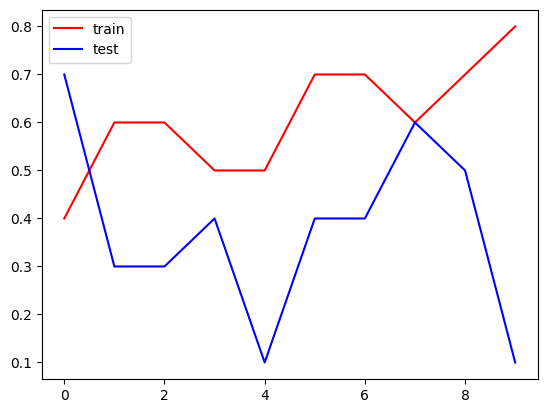

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

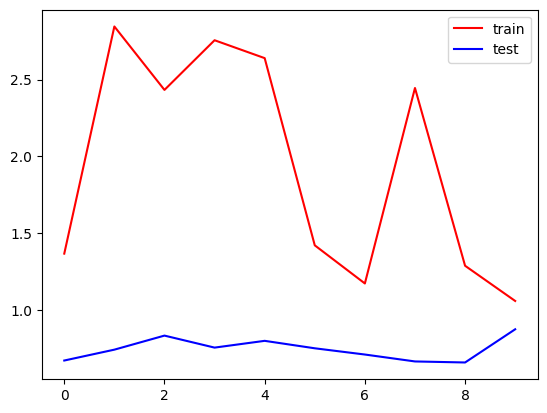

In [9]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()